# SMS Spam Classifier

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('./spam.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
553,ham,Ok. Every night take a warm bath drink a cup o...,NaN,NaN,NaN
2900,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
1312,ham,I love u 2 babe! R u sure everything is alrite...,NaN,NaN,NaN
2418,ham,"Madam,regret disturbance.might receive a refer...",NaN,NaN,NaN
4392,spam,RECPT 1/3. You have ordered a Ringtone. Your o...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
# Project Flow

# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# dropping the last 3 columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.sample(5)

,v1,v2
5438,ham,"\What are youdoing later? Sar xxx\"""""
4106,spam,HOT LIVE FANTASIES call now 08707500020 Just 2...
1046,ham,Do 1 thing! Change that sentence into: \Becaus...
4459,ham,This is wishing you a great day. Moji told me ...
3737,ham,We stopped to get ice cream and will go back a...


In [10]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace= True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [13]:
# encoding target column
df['target']= encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicate values
df= df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

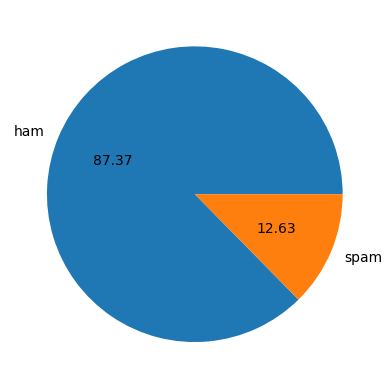

In [23]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# num of characters
df['num_characters']=  df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# num of sentences
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

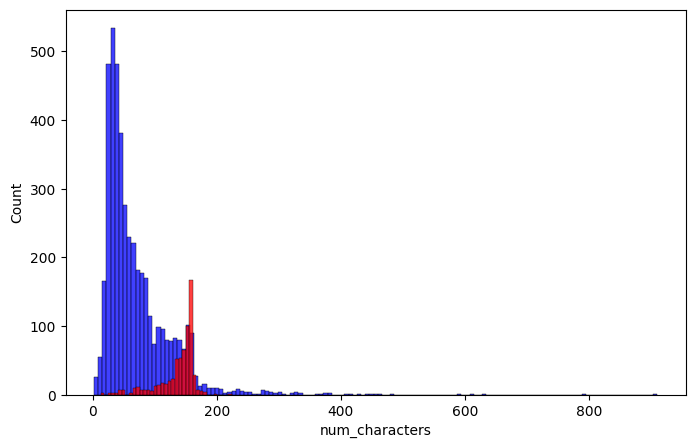

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['target']==0]['num_characters'],color='blue')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

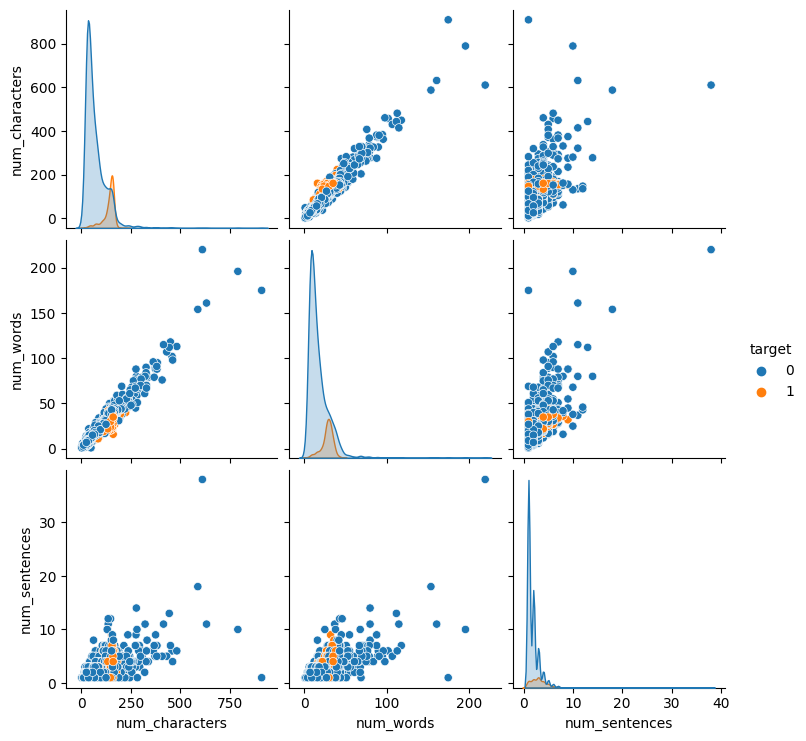

In [37]:
# multivariate analysis
sns.pairplot(df,hue='target')
# outliers present in the data

<Axes: >

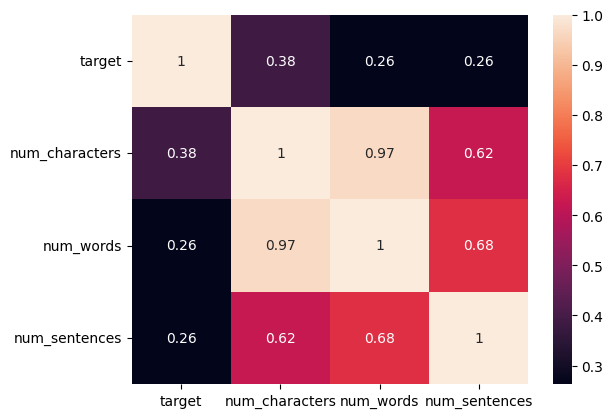

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
# num_characters, num_words and num_sentences are highly correlated to each other

## 3. Data Preprocessing

- Lower Case
- Tokenization
- Removing Special Characters
- Removing stop words and punctuations
- Stemming

In [39]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

from nltk.corpus import stopwords
nltk.download('stopwords')

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# function to perform all the steps of preprocessing on our text

def transform(text):
    
    # convert to lower case
    text= text.lower()
    
    # tokenization
    text= nltk.word_tokenize(text)
    
    # removing special characters
    temp= []
    for t in text:
        if t.isalnum():
            temp.append(t)
            
    text= temp.copy()
    temp.clear()
    
    # removing stop words and special characters
    for t in text:
        if t not in stopwords.words('english') and t not  in string.punctuation:
            temp.append(t)
            
    text= temp.copy()
    temp.clear()
    
    # stemming
    for t in text:
        temp.append(ps.stem(t))
        
    return " ".join(temp)

In [41]:
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['transformed_text']= df['text'].apply(transform)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
# generating wordcloud

from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [45]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

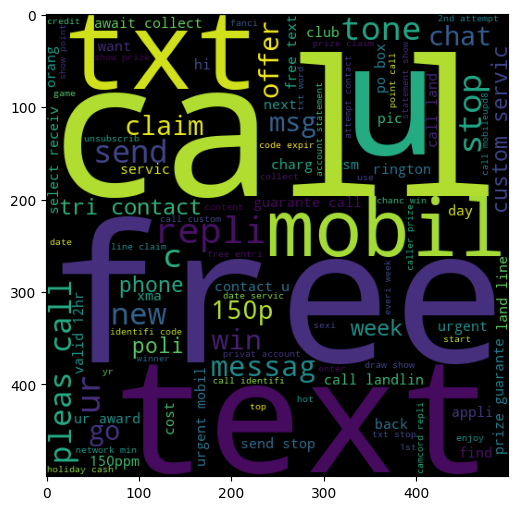

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

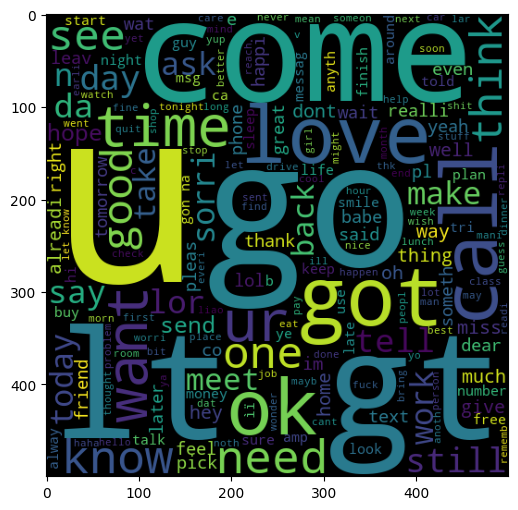

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
# finding top 30 words for spam

spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

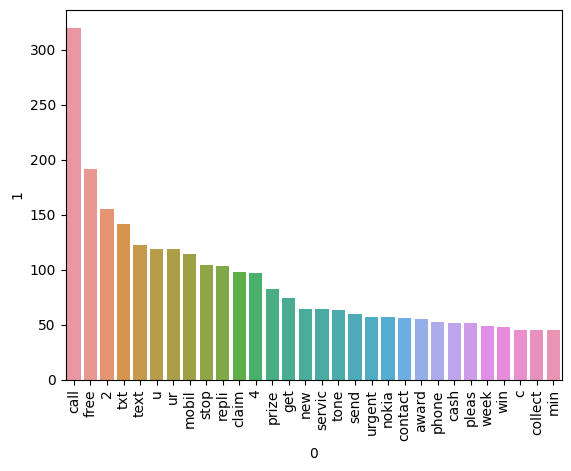

In [51]:
from collections import Counter
spam_30= pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_30[0],y=spam_30[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# finding top 30 words for ham

ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

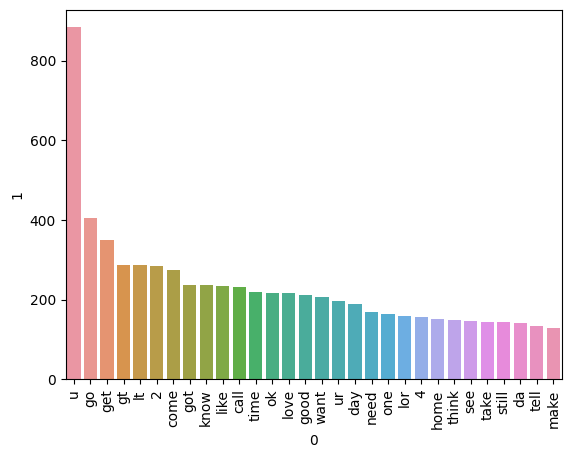

In [54]:
from collections import Counter
ham_30= pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_30[0],y=ham_30[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building and Evaluation

In [92]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [57]:
# using countvectorizer
X= cv.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 6708)

In [59]:
y= df['target']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=102)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [63]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8626692456479691
[[782 127]
 [ 15 110]]
0.4641350210970464


In [65]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[894  15]
 [ 11 114]]
0.8837209302325582


In [66]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9680851063829787
[[904   5]
 [ 28  97]]
0.9509803921568627


In [129]:
# using tfidf

X= tfidf.fit_transform(df['transformed_text']).toarray()

In [130]:
# appending num_characters into input
# X= np.hstack((X,df['num_characters'].values.reshape(-1,1)))
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
X.shape # We have chosen top 3000 features

(5169, 3000)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=102)

In [133]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[781 128]
 [ 17 108]]
0.4576271186440678


In [134]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[909   0]
 [ 25 100]]
1.0


In [113]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[905   4]
 [ 18 107]]
0.963963963963964


In [114]:
# other machine learning algorithms for comparison

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [116]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [117]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [104]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9807692307692307)

In [118]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.879110251450677
Precision -  0.0
For  KN
Accuracy -  0.9264990328820116
Precision -  0.7333333333333333
For  NB
Accuracy -  0.9506769825918762
Precision -  1.0
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8469387755102041
For  LR
Accuracy -  0.9632495164410058
Precision -  0.9223300970873787
For  RF
Accuracy -  0.97678916827853
Precision -  1.0
For  AdaBoost
Accuracy -  0.9709864603481625
Precision -  0.9130434782608695
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8666666666666667
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.9907407407407407
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.8969072164948454
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.896551724137931


In [119]:
performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_char':accuracy_scores,'Precision_num_char':precision_scores}).sort_values('Precision_num_char',ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.950677,1.000000
5,RF,0.976789,1.000000
8,ETC,0.981625,0.990741
4,LR,0.963250,0.922330
6,AdaBoost,0.970986,0.913043
9,GBDT,0.953578,0.896907
10,xgb,0.968085,0.896552
7,BgC,0.964217,0.866667
3,DT,0.944874,0.846939
1,KN,0.926499,0.733333


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.950677
1,RF,Accuracy,0.976789
2,ETC,Accuracy,0.981625
3,LR,Accuracy,0.963250
4,AdaBoost,Accuracy,0.970986
5,GBDT,Accuracy,0.953578
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.964217
8,DT,Accuracy,0.944874
9,KN,Accuracy,0.926499


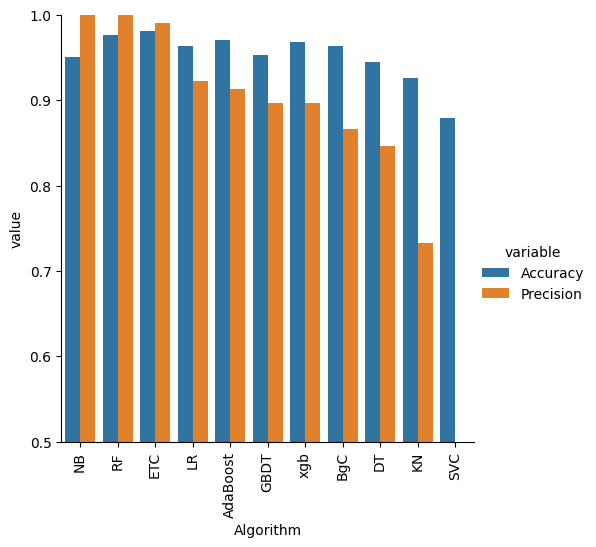

In [90]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Improvement

In [91]:
# before improvement
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.950677,1.000000
5,RF,0.976789,1.000000
8,ETC,0.981625,0.990741
4,LR,0.963250,0.922330
6,AdaBoost,0.970986,0.913043
9,GBDT,0.953578,0.896907
10,xgb,0.968085,0.896552
7,BgC,0.964217,0.866667
3,DT,0.944874,0.846939
1,KN,0.926499,0.733333


In [107]:
# 1. Set the max_features parameter of tfidf to 3000 (Accuracy increased)
perf_df= performance_df.merge(performance_df1, on='Algorithm')
perf_df

,Algorithm,Accuracy,Precision,Accuracy_tfidf_3000,Precision_tfidf_3000
0,NB,0.950677,1.000000,0.975822,1.000000
1,RF,0.976789,1.000000,0.980658,1.000000
2,ETC,0.981625,0.990741,0.981625,0.964912
3,LR,0.963250,0.922330,0.962282,0.957447
4,AdaBoost,0.970986,0.913043,0.963250,0.899083
5,GBDT,0.953578,0.896907,0.953578,0.942529
6,xgb,0.968085,0.896552,0.975822,0.962963
7,BgC,0.964217,0.866667,0.970986,0.892562
8,DT,0.944874,0.846939,0.941006,0.863636
9,KN,0.926499,0.733333,0.922631,1.000000


In [120]:
# 2. Include num_of_characters feature in the input (didn't improve the model much)
perf_df= perf_df.merge(performance_df2, on='Algorithm')
perf_df

,Algorithm,Accuracy,Precision,Accuracy_tfidf_3000,Precision_tfidf_3000,Accuracy_num_char,Precision_num_char
0,NB,0.950677,1.000000,0.975822,1.000000,0.950677,1.000000
1,RF,0.976789,1.000000,0.980658,1.000000,0.976789,1.000000
2,ETC,0.981625,0.990741,0.981625,0.964912,0.981625,0.990741
3,LR,0.963250,0.922330,0.962282,0.957447,0.963250,0.922330
4,AdaBoost,0.970986,0.913043,0.963250,0.899083,0.970986,0.913043
5,GBDT,0.953578,0.896907,0.953578,0.942529,0.953578,0.896907
6,xgb,0.968085,0.896552,0.975822,0.962963,0.968085,0.896552
7,BgC,0.964217,0.866667,0.970986,0.892562,0.964217,0.866667
8,DT,0.944874,0.846939,0.941006,0.863636,0.944874,0.846939
9,KN,0.926499,0.733333,0.922631,1.000000,0.926499,0.733333


In [121]:
# applying voting classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [122]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [123]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9487427466150871
Precision 1.0


In [124]:
# applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [125]:
from sklearn.ensemble import StackingClassifier

In [126]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [127]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9344262295081968


In [135]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))